## Imports

In [1]:
import os
import re
import sys
import typing
import gc
import pandas as pd
import pickle
import logging

sys.path.append(
    os.path.join('.','src')
)

from src.models import Pipeline
from src.nodes import *

In [ ]:
logging.basicConfig(filename='logs/logs.log', level=logging.DEBUG)

# Tweets Model

In [ ]:
pipeline = Pipeline('CONFIG_MODEL_TWEETS.json', load_model_data = True)

In [ ]:
d = {
    'train_set_len' : len(pipeline.train_dataset),
    'train_set_tokens' : pipeline.train_dataset.token_len(),
    'val_set_len' : len(pipeline.val_dataset),
    'val_set_tokens' : pipeline.val_dataset.token_len(),
    'test_set_len' : len(pipeline.test_dataset),
    'test_set_tokens' : pipeline.test_dataset.token_len(),
}

In [ ]:
d

In [ ]:
pipeline.perplexity()

In [ ]:
pipeline.train_model()

In [ ]:
pipeline.perplexity()

In [ ]:
pipeline = Pipeline('CONFIG_MODEL_TWEETS.json', load_model_data = False)

In [ ]:
pipeline.load_model('models/tweets/tweets.pth')

In [ ]:
pipeline.generate(start_text = 'all', num_words = 40)

In [ ]:
pipeline.generate(start_text = 'what', num_words = 40)

In [ ]:
pipeline.generate(start_text = 'i like', num_words = 40)

# Wiki Model

In [ ]:
pipeline = Pipeline('CONFIG_MODEL_WIKI.json', load_model_data = True)

In [ ]:
pipeline.perplexity(with_recall = True, with_tqdm = True)

In [ ]:
pipeline.load_model('models/wiki103/wiki103.pth')

In [ ]:
pipeline.perplexity(with_recall = True, with_tqdm = True)

In [ ]:
pipeline.train_model()

In [ ]:
pipeline.perplexity()

In [ ]:
pipeline.generate(start_text = 'all', num_words=40)

In [ ]:
pipeline.generate(start_text = 'what', num_words=40)

In [ ]:
pipeline.generate(start_text = 'i like')

In [ ]:
d = {
    'train_set_len' : len(pipeline.train_dataset),
    'train_set_tokens' : pipeline.train_dataset.token_len(),
    'val_set_len' : len(pipeline.val_dataset),
    'val_set_tokens' : pipeline.val_dataset.token_len(),
    'test_set_len' : len(pipeline.test_dataset),
    'test_set_tokens' : pipeline.test_dataset.token_len(),
}

In [ ]:
import pickle
from src.data_processing import *

In [ ]:
a = []
for f in os.listdir('nodes_data/nodes_data_wiki103'):
    f = os.path.join('nodes_data/nodes_data_wiki103', f)
    
    with open(f, 'rb') as file:
        a.append(pickle.load(file))

In [ ]:
seq = SequenceDataset(
    federated.vocabulary,
    a[0],
    min_seq_length = 2,
    max_seq_length = 30,
    device = None
)

In [ ]:
for s in seq:
    print(sum(s))

## FedAVG

In [ ]:
from src.federated_pipeline import Federated_AVG

import os
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

In [ ]:
federated = Federated_AVG(
    "CONFIG_MODEL_TWEETS.json",
    "CONFIG_FEDERATED_TWEETS.json",
    testing = True
)

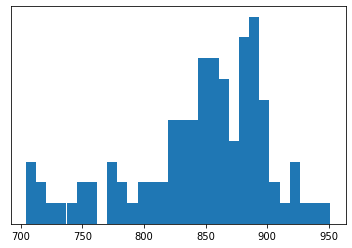

In [24]:
plt.hist([len(n.data) for n in federated.nodes.values()], bins = 30, density=True, cumulative=False, align='right')
plt.yticks([])
plt.show()

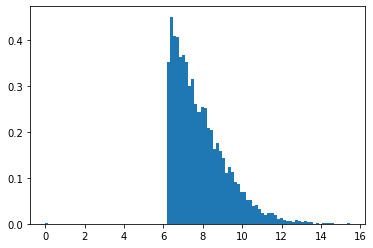

In [54]:
x = np.array(list(federated.vocabulary.vocab.values()))
x = np.log(x)
plt.hist(x, bins = 100, density=True)
plt.show()

In [57]:
for n, _ in federated.general_model.named_parameters():
    print(n)

embedding_layer.weight
rnn.weight_ih_l0
rnn.weight_hh_l0
rnn.bias_ih_l0
rnn.bias_hh_l0
rnn.weight_ih_l1
rnn.weight_hh_l1
rnn.bias_ih_l1
rnn.bias_hh_l1
linear.weight
linear.bias


In [8]:
pd.DataFrame(federated.results)

,0,1,2,3,4,5,6,7,8,9,10
perplexity,109.786,116.941,3.69556e+14,764319,6190.48,5.92698e+06,764319,6684.71,4079.73,1815.65,1567.93
loss,4.70025,4.76361,33.5265,13.5431,8.73029,15.5915,13.5431,8.80671,8.31287,7.50315,7.35653
f1_recall,0.238012,0.234265,0.012554,0.0121666,0.0110788,0.0102518,0.0121666,0.00774847,0.0376248,0.0203248,0.0413351
f3_recall,0.366637,0.360244,0.0307555,0.0279988,0.053986,0.0192594,0.0279988,0.059775,0.0619133,0.0836165,0.15193
generate,all work and no play for an individual sets in,all work and no play. He did not because,all work and no play play play a makes.,all work and no play makes a a dull and,all work and no play convincing sailed wounds ...,all work and no play play play play makes makes,all work and no play makes makes dull dull boy,all work and no play Manor continental partial...,all work and no play renamed exercised colleag...,all work and no play in in as precipitation Al...,all work and no play death ocean Cook numbers no
attack_perplexity,180.865,204.177,289.102,5.38052,58.4259,24.2049,5.38052,47.6818,25.7298,56.0435,91.072
perplexity_1,104.362,95.6604,1.63921e+14,579903,5020.43,4.52612e+06,579903,5389.15,3295.59,1494.64,1302.36
loss_1,4.63824,4.5494,32.4852,13.1439,8.49179,15.1607,13.1439,8.55767,8.07178,7.29761,7.15953
f1_recall_1,0.242661,0.242661,0.0117417,0.0176125,0.0156556,0.00782779,0.0176125,0.0117417,0.0547945,0.0273973,0.0547945
f3_recall_1,0.377691,0.39726,0.037182,0.0391389,0.072407,0.0176125,0.0391389,0.072407,0.0782779,0.109589,0.164384


## LICCHAVI

In [5]:
from src.federated_pipeline import Federated_LICCHAVI
from src.utils import update_json

import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import torch
import re
import numpy as np

In [6]:
gamma_0 = 0.005
gamma_n = 0.005
for w in [1]:
    for delta_c in [10]:
        for b in [32]:
            update_json(os.path.join('.','config_files', "CONFIG_FEDERATED_TWEETS.json"),
                general_model_lr = gamma_0,
                node_model_lr = gamma_n,
                p_n = delta_c,
                lambda_n = w,
                
            )
            federated = Federated_LICCHAVI(
                "CONFIG_MODEL_TWEETS.json",
                "CONFIG_FEDERATED_TWEETS.json",
                testing = True
            )
            federated.train(2, save_results = True)

  0%|          | 0/20 [00:00<?, ?it/s]

round 0


 35%|███▌      | 7/20 [00:02<00:05,  2.58it/s]


KeyboardInterrupt: 

In [12]:
for n in list(federated.nodes.values()):
    print(len(n.data))

857
888
883
849
859
801
872
832
755
776
771
840
888
767
947
840
840
840
840
840


In [28]:
results_folder = 'attacks_results_huber'

def collect_results():
    all_metrics = {}
    i = 0
    agg = {}
    for data in ['tweets']:
        agg[data] = {}
        for algorithm in ['LICCHAVI_L2']:
            agg[data][algorithm] = {}
            path = os.path.join(results_folder, data, algorithm)
            for file in os.listdir(path):
                hyperparams_file = os.path.join(path, file, 'hyperparams.pickle')
                metrics_file = os.path.join(path, file, 'metrics.pickle')

                with open(hyperparams_file, 'rb') as f:
                    hyperparams = pickle.load(f)

                with open(metrics_file, 'rb') as f:
                    metrics = pickle.load(f)

                byz_type = hyperparams['FEDERATED_ARGS']['byzantine_type']
                K = hyperparams['FEDERATED_ARGS']['num_training_nodes']
                f = hyperparams['FEDERATED_ARGS']['num_byzantine']
                f = i
                i+=1

                if byz_type != 'null':
                    layers = None
                    if 'max' in metrics[0].keys():
                        layers = metrics.pop('layers')
                        # for every round, the first is the general reg, the last the total gradient and
                        # the intermediat the nodes gradients. So x[-1] only takes the general gradient
                        max_ = [x[-1] for x in [metrics[i].pop('max') for i in range(0, 21)][1:]]
                        avg = [x[-1] for x in [metrics[i].pop('avg') for i in range(0, 21)][1:]]
                        L1 = [x[-1] for x in [metrics[i].pop('L1') for i in range(0, 21)][1:]]

                    nodes_att_perpl = list(pd.DataFrame(metrics).T.filter(regex = r'attack_perplexity_').T.mean())
                    nodes_f3_recall = list(pd.DataFrame(metrics).T.filter(regex = r'f3_recall_').T.mean())

                    model_att_perpl = list(pd.DataFrame(metrics).T['attack_perplexity'])
                    model_f3_recall = list(pd.DataFrame(metrics).T['f3_recall'])

                    if byz_type not in agg[data][algorithm].keys():
                        agg[data][algorithm][byz_type] = {}

                    if K not in agg[data][algorithm][byz_type].keys():
                        agg[data][algorithm][byz_type][K] = {}

                    agg[data][algorithm][byz_type][K][f] = {
                        'nodes_att_perpl' : nodes_att_perpl,
                        'nodes_f3_recall' : nodes_f3_recall,
                        'model_att_perpl' : model_att_perpl,
                        'model_f3_recall' : model_f3_recall,
                        'params' : hyperparams
                    }


                    if layers is not None:
                        agg[data][algorithm][byz_type][K][f].update({
                            'layers' : layers,
                            'max' : max_,
                            'avg' : avg,
                            'L1' : L1
                        })
    return agg, all_metrics

def draw(ax, data, alg, attack, num_nodes, byz_prop, model, data_name, model_lr, node_lr, lambda_n, p_n):
    
    data = np.array(data)
    MAX = (1500 if data_name == 'tweets' else 400)
    data = np.where(data > MAX, MAX, data)
    if max(data) > 1 and model:
        ax.set_title(alg, fontsize = 20)
    if byz_prop == 0:
        c = 'green'
        zorder = 0
    elif byz_prop == 1:
        c = 'blue'
        zorder = 5
    elif byz_prop == 2:
        c = 'red'
        zorder = 10
    elif byz_prop == 3:
        c = 'black'
        zorder = 15
    if model:
        line, = ax.plot(data, '^-', c = c, alpha = 0.7, zorder = zorder)
        line.set_label(f'$\gamma_0$: {model_lr} $\gamma_k$: {model_lr} $w$: {lambda_n} $\delta$: {p_n}')
    else:
        line, = ax.plot(data, 'o--', c = c, alpha = 0.7, zorder = zorder)
    
    if alg == 'LICCHAVI_L1' and max(data) < 1:
        ax.set_xlabel('Rounds', fontsize = 20)
    
    if alg == 'FedAVG':
        if max(data) > 1:
            ax.set_ylabel('Attack Perplexity', fontsize = 18)
        else:
            ax.set_ylabel('$R_3$', fontsize = 20)
            
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.set_xticks([0,5,10,15,20])
    
def plot_attack_licchavi(agg, attack_name, data_name, K = 50):
    
    fig, axs = plt.subplots(2, 1, sharex = True, sharey = 'row', figsize = (16,8))
    for k, (alg, data) in enumerate(agg[data_name].items()):
        for attack, attack_data in data.items():
            if attack == attack_name:
                for num_nodes, nodes_data in attack_data.items():
                    if num_nodes == K:
                        for byz_prop, perp_f3 in nodes_data.items():
                            params = perp_f3['params']
                            model_lr = params['FEDERATED_ARGS']['general_model_lr']
                            node_lr = params['FEDERATED_ARGS']['node_model_lr']
                            lambda_n = params['FEDERATED_ARGS']['lambda_n']
                            p_n = params['FEDERATED_ARGS']['p_n']
                            draw(axs[0], perp_f3['nodes_att_perpl'], alg, attack, num_nodes, byz_prop, model = False, data_name = data_name, model_lr = model_lr, node_lr = node_lr, lambda_n = lambda_n, p_n = p_n)
                            draw(axs[1], perp_f3['nodes_f3_recall'], alg, attack, num_nodes, byz_prop, model = False, data_name = data_name, model_lr = model_lr, node_lr = node_lr, lambda_n = lambda_n, p_n = p_n)

                            draw(axs[0], perp_f3['model_att_perpl'], alg, attack, num_nodes, byz_prop, model = True, data_name = data_name, model_lr = model_lr, node_lr = node_lr, lambda_n = lambda_n, p_n = p_n)
                            draw(axs[1], perp_f3['model_f3_recall'], alg, attack, num_nodes, byz_prop, model = True, data_name = data_name, model_lr = model_lr, node_lr = node_lr, lambda_n = lambda_n, p_n = p_n)
                                
    
    axs[0].set_ylim([0, None])
    axs[0].grid()
    axs[1].set_ylim([0, (0.5 if data_name == 'tweets' else 0.45)])
    axs[1].grid()
    # sorts and dusplays labels
    handles, labels = axs[1].get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    axs[1].legend(handles, labels)
    plt.tight_layout()
    fig.text(0.5, 0.04, 'Rounds of Communication', va='center', ha='center', fontsize=18)
    axs[0].set_ylabel('Attack Perplexity', fontsize = 18)
    axs[1].set_ylabel('$R_3$', fontsize = 18)
    axs[1].set_xlabel(None)
    plt.gcf().subplots_adjust(bottom=0.10)
    plt.gcf().subplots_adjust(left = 0.05)
    fig.savefig(f'plots/licchavi_huber_{data_name}_{attack_name}_{K}')
    
def plot_best(agg, attack_name, data_name, with_nodes = False):
    fig, axs = plt.subplots(2, 1, sharex = True, sharey = 'row', figsize = (15,4))
    K = 100 if data_name == 'tweets' else 500
    
    l2 = agg[data_name]['LICCHAVI_L2'][attack_name][K]
    
    for k, (title, loss) in enumerate(zip(['huber'],[l2])):
        maxes = []
        lasts = []
        min_att = []
        last_att = []
        for i, f in enumerate([0,1,2,3]):
            data = loss[f]
            maxes.append(np.max(data['model_f3_recall']))
            lasts.append(data['model_f3_recall'][-1])
            min_att.append(np.min(data['model_att_perpl']))
            last_att.append(data['model_att_perpl'][np.argmax(data['model_f3_recall'])])
        
        axs[0].bar([0,1,2,3], maxes, tick_label = [0,0.1,0.3,0.5], color = 'red', alpha = 0.7)
        axs[0].bar([0,1,2,3], lasts, tick_label = [0,0.1,0.3,0.5], color = 'green', alpha = 0.2)
        axs[0].set_title(title, fontsize = 20)
        
        axs[1].bar([0,1,2,3], last_att, tick_label = [0,0.1,0.3,0.5], color = 'red', alpha = 0.7)
        # axs[1,k].bar([0,1,2,3], min_att, tick_label = [0,0.1,0.3,0.5], color = 'green', alpha = 0.2)
        
        
        for i,M in enumerate(maxes):
            s = str(round(float(M), 4))
            axs[0].annotate(s, xy=(i-0.27,M+0.002))
        
        
        for i,M in enumerate(last_att):
            s = str(round(float(M), 1))
            axs[1].annotate(s, xy=(i-0.27,M+0.002))
            
    title = re.sub('_',' ', attack_name)
    fig.text(0.52, 0.995, f'General model $R_3$ for {data_name} under {title}', va = 'center', ha = 'center', fontsize = 20)
    
    for ax in axs[0]:
        ax.set_ylim([
            (0.4 if data_name == 'tweets' else 0.3),
            (0.48 if data_name == 'tweets' else 0.38)
        ])
    

In [14]:
agg, metrics = collect_results()

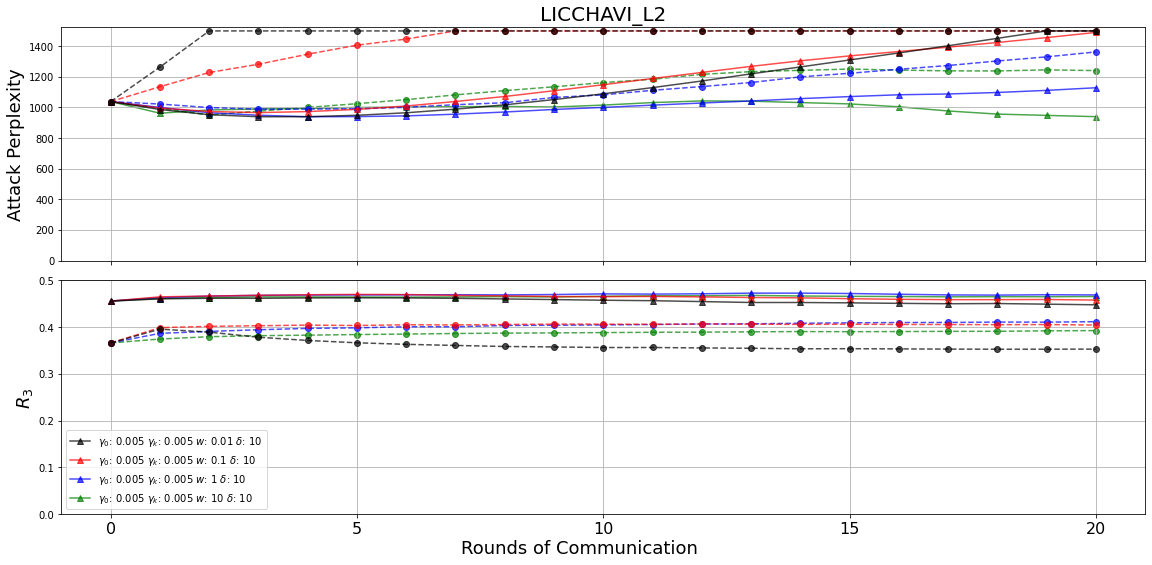

In [15]:
plot_attack_licchavi(agg, 'data_poisoning', 'tweets', K = 100)

TypeError: 'AxesSubplot' object is not iterable

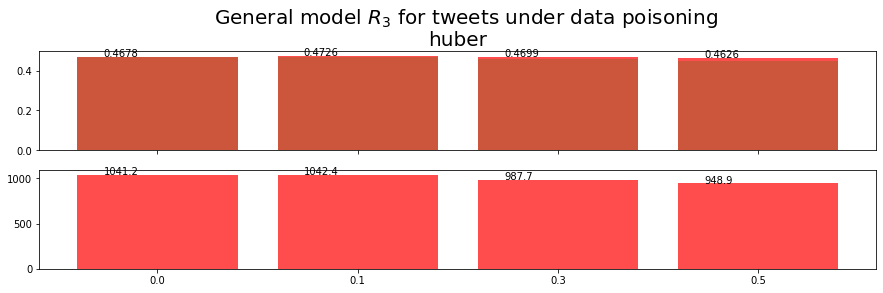

In [29]:
plot_best(agg, 'data_poisoning', 'tweets')

In [80]:
federated = Federated_LICCHAVI(
    "CONFIG_MODEL_WIKI.json",
    "CONFIG_FEDERATED_WIKI.json",
    testing = True
)

100%|██████████| 10/10 [00:00<00:00, 40.32it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

round 0


  0%|          | 0/10 [00:00<?, ?it/s]

round 1


  0%|          | 0/10 [00:00<?, ?it/s]

round 2


  0%|          | 0/10 [00:00<?, ?it/s]

round 3


  0%|          | 0/10 [00:00<?, ?it/s]

round 4


  0%|          | 0/10 [00:00<?, ?it/s]

round 5


100%|██████████| 10/10 [00:04<00:00,  2.31it/s]


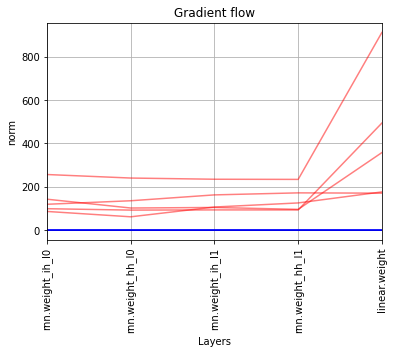

In [5]:
federated.train(5, save_results=False)